In [12]:
import torch
print(torch.cuda.is_available())

False


In [1]:
!nvidia-smi

Fri Mar 10 18:26:08 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 457.20       Driver Version: 457.20       CUDA Version: 11.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce MX150      WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   30C    P0    N/A /  N/A |     64MiB /  2048MiB |      4%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
import os
HOME = os.getcwd() # google colab helper
print(HOME)

C:\Users\Jake\DataSpell


In [2]:
# Pip install method (recommended) - yolov8 is the first iteration to be installable with pip

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20  Python-3.8.16 torch-1.13.1+cpu CPU
Setup complete  (8 CPUs, 31.9 GB RAM, 357.6/465.2 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics 

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

In [12]:
print(HOME)

C:\Users\Jake\DataSpell


In [5]:
!mkdir {HOME}\datasets
%cd {HOME}\datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="NotZ49lvMpo1QwEINQgR")
project = rf.workspace("iadt").project("lola")
dataset = project.version(2).download("yolov8")

C:\Users\Jake\DataSpell\datasets


A subdirectory or file C:\Users\Jake\DataSpell\datasets already exists.


  Using cached roboflow-0.2.32-py3-none-any.whl (50 kB)
  Using cached requests_toolbelt-0.10.1-py2.py3-none-any.whl (54 kB)
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to lola-2 in yolov8:: 100%|██████████| 350/350 [00:00<00:00, 870.65it/s]


## Custom Training

In [7]:
%ls

 Volume in drive C has no label.
 Volume Serial Number is 12A1-9E1D

 Directory of C:\Users\Jake\DataSpell

10/03/2023  18:45    <DIR>          .
10/03/2023  18:45    <DIR>          ..
10/03/2023  18:36    <DIR>          .idea
10/03/2023  18:45         1,418,746 Copy_of_train_yolov8_object_detection_on_custom_dataset.ipynb
10/03/2023  18:42    <DIR>          lola-2
10/03/2023  18:45    <DIR>          runs
10/03/2023  18:45         6,534,387 yolov8n.pt
               2 File(s)      7,953,133 bytes
               5 Dir(s)  117,709,508,608 bytes free


In [9]:
print(dataset.location)

C:\Users\Jake\DataSpell\lola-2


In [17]:
# Apparently unsafe workaround for 'Error #15: Initializing libiomp5md.dll, but found libiomp5md.dll already initialized.'
# Nothing else worked, so:
#os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [22]:
print(dataset.location)

C:\Users\Jake\DataSpell\datasets\lola-2


In [ ]:
!pip install torch==1.9.0+cu111 torchvision==0.10.0+cu111 torchaudio===0.9.0 -f https://download.pytorch.org/whl/torch_stable.html

In [10]:
#!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}\data.yaml epochs=1500 imgsz=800 plots=True device='gpu'
#model = YOLO("!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}\data.yaml epochs=1500 imgsz=800 plots=True device='gpu'")
!yolo detect train model=yolov8n.pt data={dataset.location}\data.yaml epochs=1500 imgsz=800 plots=True device=0

Traceback (most recent call last):
  File "C:\Users\Jake\anaconda3\envs\yolov8\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\Jake\anaconda3\envs\yolov8\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\Jake\anaconda3\envs\yolov8\Scripts\yolo.exe\__main__.py", line 7, in <module>
  File "C:\Users\Jake\anaconda3\envs\yolov8\lib\site-packages\ultralytics\yolo\cfg\__init__.py", line 249, in entrypoint
    getattr(model, mode)(verbose=True, **overrides)
  File "C:\Users\Jake\anaconda3\envs\yolov8\lib\site-packages\ultralytics\yolo\engine\model.py", line 203, in train
    self.trainer = self.TrainerClass(overrides=overrides)
  File "C:\Users\Jake\anaconda3\envs\yolov8\lib\site-packages\ultralytics\yolo\engine\trainer.py", line 83, in __init__
    self.device = select_device(self.args.device, self.args.batch)
  File "C:\Users\Jake\anaconda3\envs\yolov8\lib\site-packages\ultralytics\yolo\utils\tor

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    train_batch2.jpg
confusion_matrix.png				    train_batch660.jpg
events.out.tfevents.1677439382.7c2ef5a72a64.7852.0  train_batch661.jpg
F1_curve.png					    train_batch662.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
R_curve.png					    val_batch1_labels.jpg
results.csv					    val_batch1_pred.jpg
results.png					    val_batch2_labels.jpg
train_batch0.jpg				    val_batch2_pred.jpg
train_batch1.jpg				    weights


/content


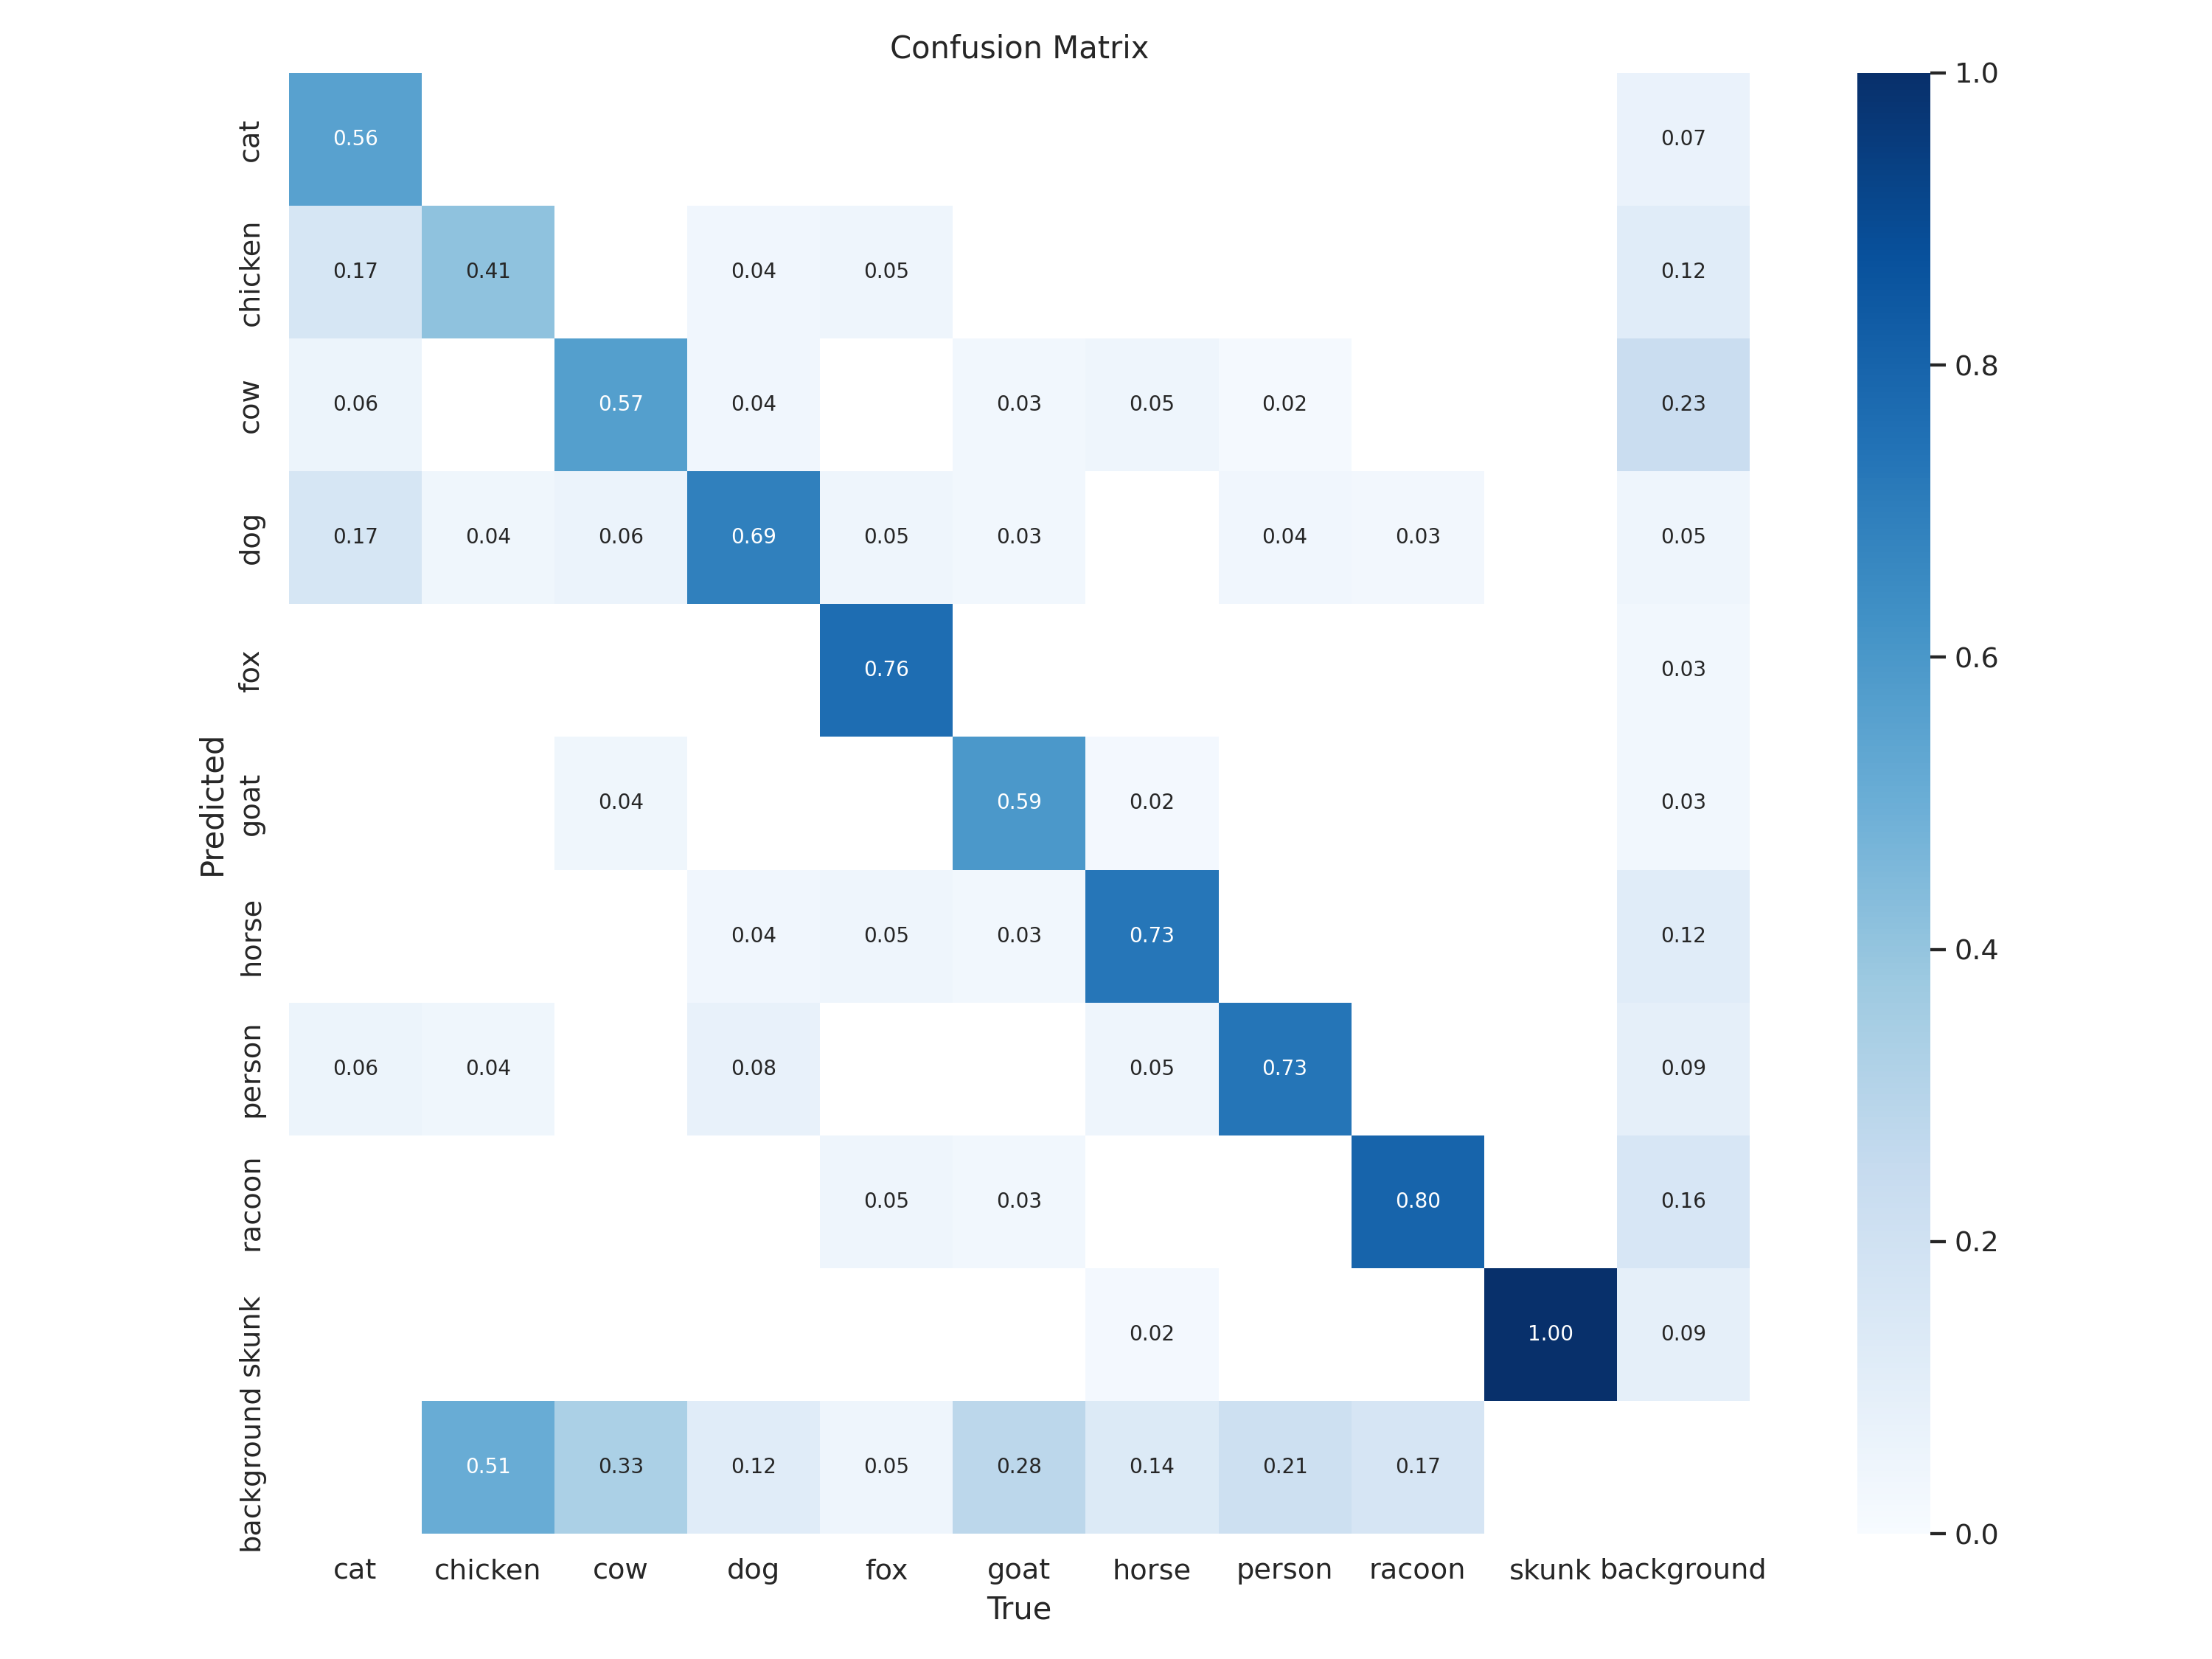

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


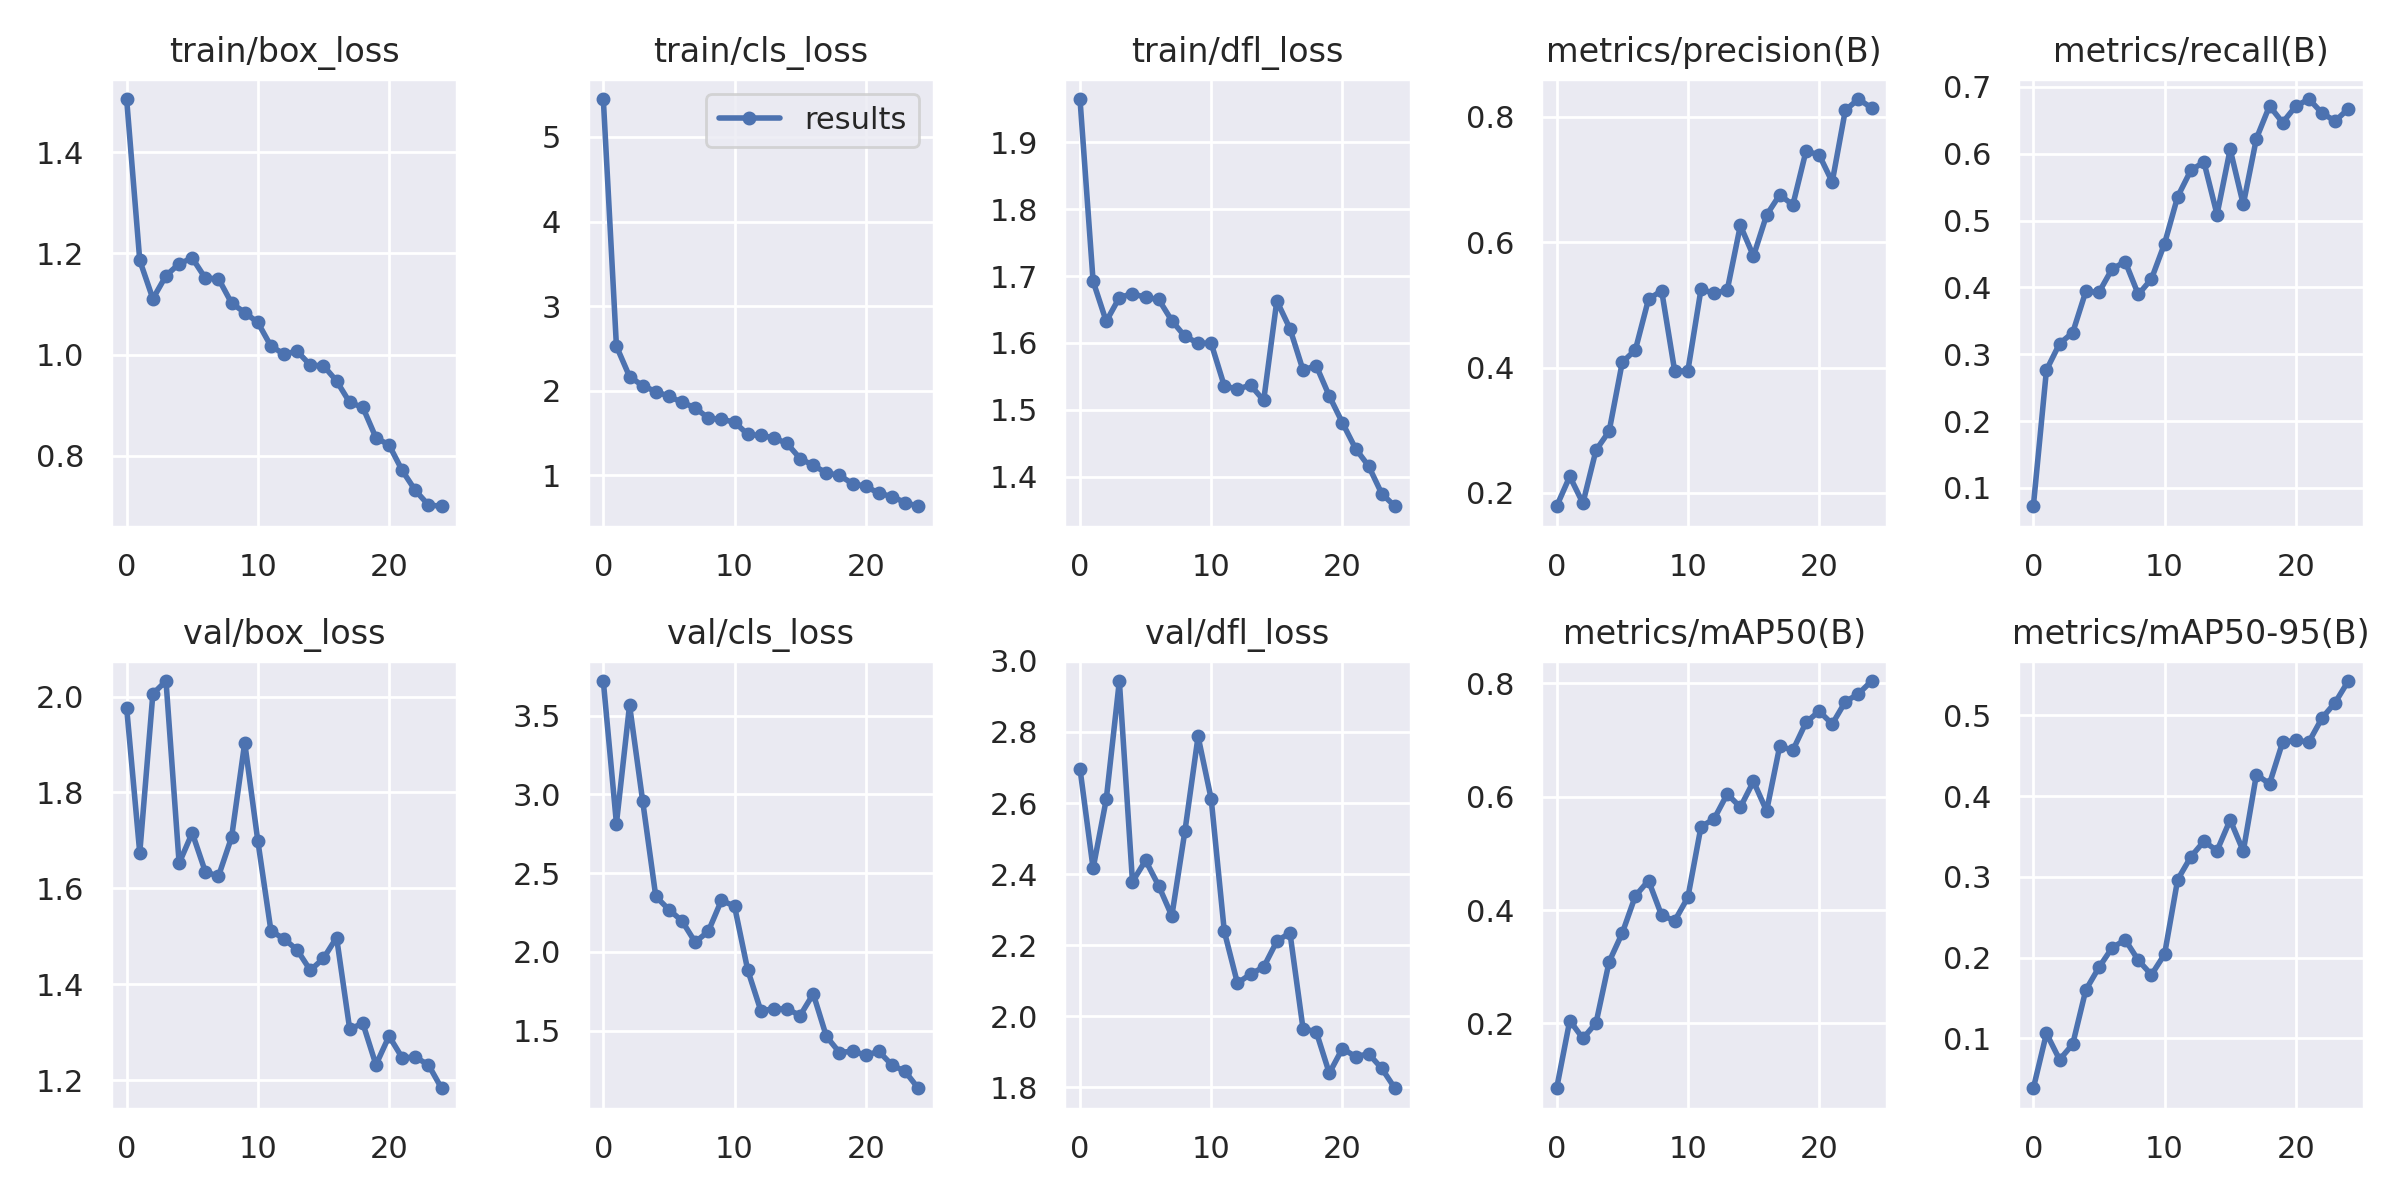

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


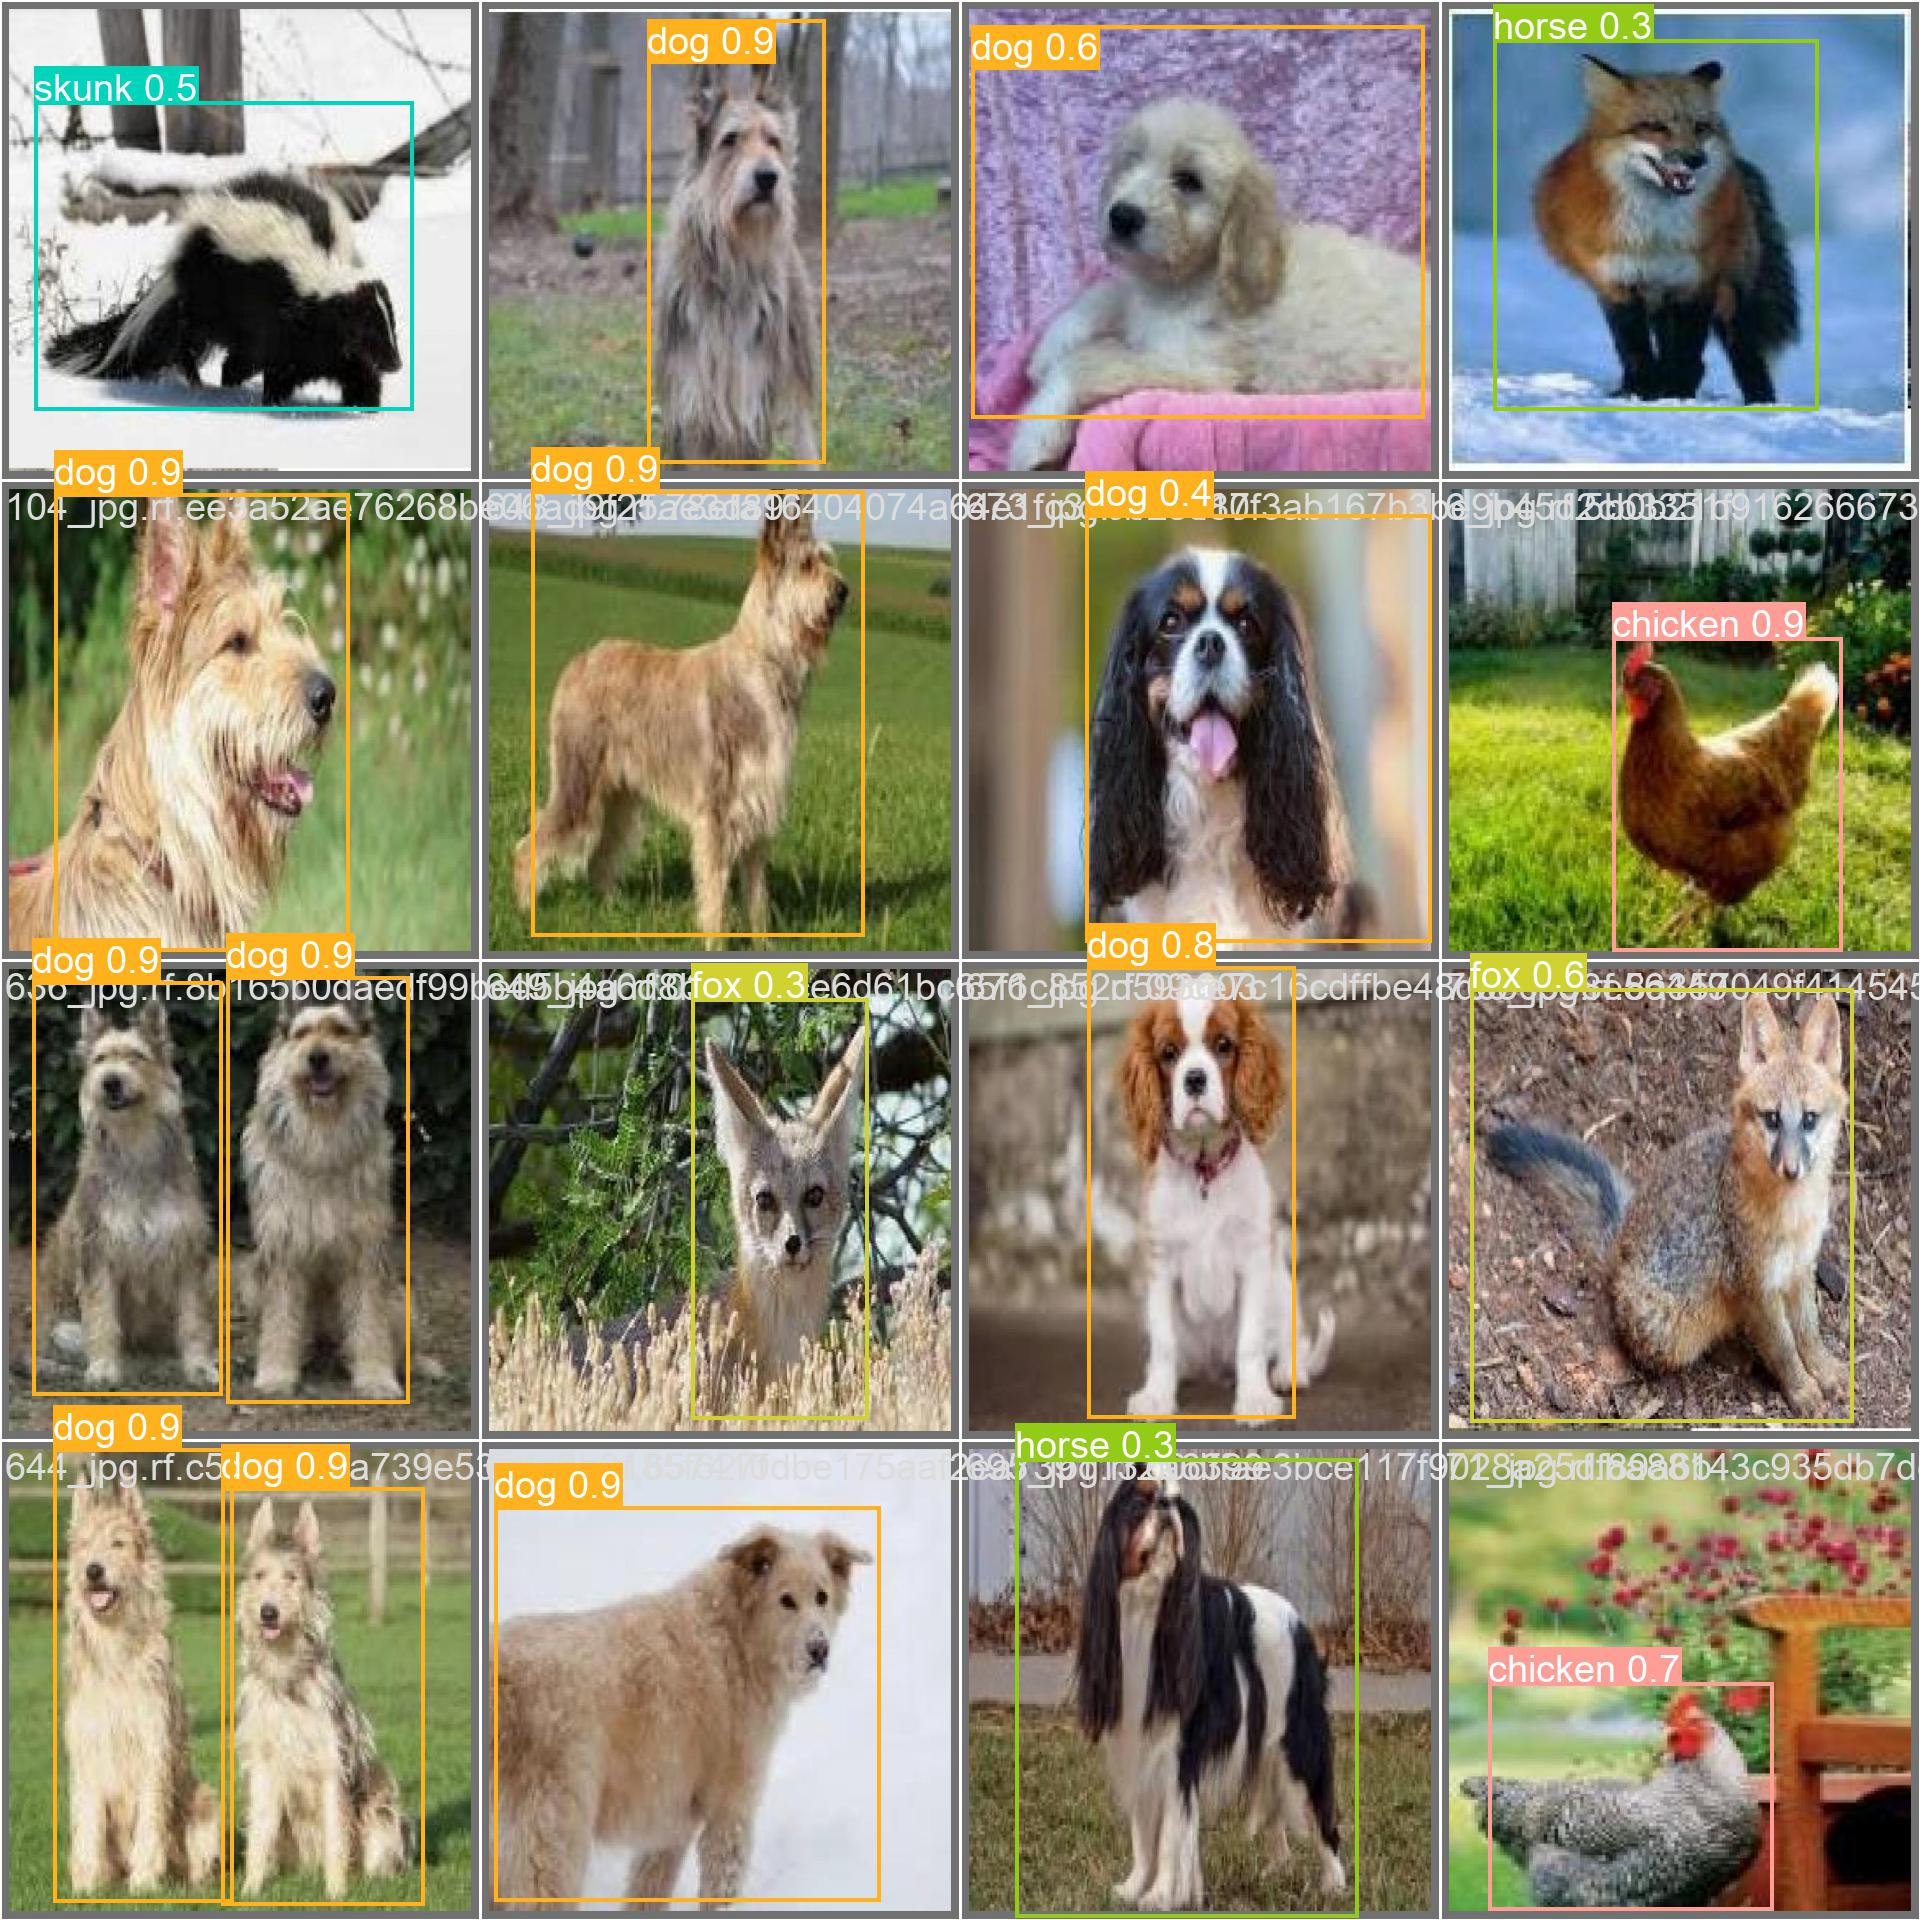

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129454 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/animals-detection-1/valid/labels.cache... 200 images, 0 backgrounds, 0 corrupt: 100% 200/200 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 13/13 [00:06<00:00,  1.94it/s]
                   all        200        351      0.814      0.668      0.804      0.543
                   cat        200         18      0.821      0.556      0.797      0.502
               chicken        200         51      0.665      0.427      0.605      0.369
                   cow        200         51      0.628      0.563      0.612      0.351
                   dog        200         26      0.683      0.692      0.767      0.562
                   fox        200         21          1      0.658      0.921      0.729
                  goa

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.9 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
Model summary: 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
image 1/13 /content/datasets/football-players-detection-1/test/images/40cd38_7_6_png.rf.68ef7fcd663cdf0f5b96bacdbcd94e07.jpg: 384x640 21 players, 15.0ms
image 2/13 /content/datasets/football-players-detection-1/test/images/42ba34_1_5_png.rf.4337fde8fbe3640cf4351fb41ac9c3ca.jpg: 384x640 1 goalkeeper, 21 players, 2 referees, 11.6ms
image 3/13 /content/datasets/football-players-detection-1/test/images/42ba34_5_5_png.rf.ceb556bd4c92d41496ae1d8c56600c4a.jpg: 384x640 1 goalkeeper, 20 players, 1 referee, 11.7ms
image 4/13 /content/datasets/football-players-detection-1/test/images/4b770a_1_4_png.rf.5a45b3b841a06de414ceb802e34c136f.jpg: 384x640 1 goalkeeper, 20 players, 4 referees, 11.6ms
image 5/13 /content/datasets/football-players-detection-1/test/images/4b770a_3_6_png.rf.d0d9403f2f73ca0da7a6a1373c02b749.jpg:

**NOTE:** Let's take a look at few results.

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.


In [ ]:
#While your deployment is processing, checkout the deployment docs to take your model to most destinations https://docs.roboflow.com/inference

In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred